In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

In [2]:
data = pd.read_excel("data_project2.xlsx")
data

,Gene Name,Annotation,Accession #,Probe Name,Class Name,Species Name,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,...,20151118_CAN IMMUN PROF PREOP2_NYU 789GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 957GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1005GR_08.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1270GR_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC
0,NaN,NaN,NaN,NaN,NaN,NaN,ADS1,ADS1,ADS1,ADS1,...,GR,GR,GR,GR,GR,GR,GR,GR,GR,GR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2M,NaN,NM_000014.4,NM_000014.4:1685,Endogenous,Hs,14,41,29,12,...,26,15,10,6,18,67,20,13,23,7
3,ABCB1,NaN,NM_000927.3,NM_000927.3:3910,Endogenous,Hs,60,105,67,58,...,54,47,47,9,80,164,34,53,52,11
4,ABL1,NaN,NM_005157.3,NM_005157.3:3200,Endogenous,Hs,59,59,43,47,...,30,42,60,17,72,51,41,27,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,POS_B,NaN,ERCC_00112.1,ERCC_00112.1:695,Positive,CUS,18199,18815,22041,22288,...,16896,17385,16249,17848,18360,19100,17543,14252,17214,15418
782,POS_C,NaN,ERCC_00002.1,ERCC_00002.1:850,Positive,CUS,5266,5336,6273,6345,...,5472,5600,5055,5753,5693,5916,5290,4517,5210,4798
783,POS_D,NaN,ERCC_00092.1,ERCC_00092.1:540,Positive,CUS,1391,1278,1611,1536,...,1175,1275,1208,1236,1320,1251,1186,959,1151,1063
784,POS_E,NaN,ERCC_00035.1,ERCC_00035.1:485,Positive,CUS,225,256,291,292,...,221,233,209,234,242,282,221,168,175,174


In [3]:
ADS1_GR_index = data.iloc[[0]]
ADS1_GR_index = ADS1_GR_index.drop(columns = ['Gene Name','Annotation','Accession #','Probe Name','Class Name','Species Name'])
ADS1_GR_index = ADS1_GR_index.transpose()
ADS1_GR_index.rename(columns={0:'type'}, inplace = True)
ADS1_GR_index

,type
20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,ADS1
20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,ADS1
20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,ADS1
20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,ADS1
20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,ADS1
...,...
20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,GR
20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,GR
20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,GR
20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,GR


In [4]:
df = data.set_index("Gene Name")
df = df.drop(columns = ['Annotation','Accession #','Probe Name','Class Name','Species Name'])
df = df.iloc[2:]
df

,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU125 S1_04.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU175 S1_06.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU201 S1_05.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU50 S1_01.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU62 S1_02.RCC,...,20151118_CAN IMMUN PROF PREOP2_NYU 789GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 957GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1005GR_08.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1270GR_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,14,41,29,12,36,26,26,14,36,30,...,26,15,10,6,18,67,20,13,23,7
ABCB1,60,105,67,58,85,49,31,28,53,34,...,54,47,47,9,80,164,34,53,52,11
ABL1,59,59,43,47,33,27,27,27,39,34,...,30,42,60,17,72,51,41,27,28,7
ADA,116,128,58,68,64,41,41,37,49,48,...,47,82,83,18,95,127,86,51,53,13
ADORA2A,93,92,97,39,61,26,116,27,25,35,...,38,49,42,8,63,101,54,32,24,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,18199,18815,22041,22288,19967,19919,19433,22695,19901,21481,...,16896,17385,16249,17848,18360,19100,17543,14252,17214,15418
POS_C,5266,5336,6273,6345,5674,5715,5586,6514,5689,6223,...,5472,5600,5055,5753,5693,5916,5290,4517,5210,4798
POS_D,1391,1278,1611,1536,1317,1307,1385,1590,1386,1531,...,1175,1275,1208,1236,1320,1251,1186,959,1151,1063


In [5]:
#split the dataset into train dataset and test dataset (80%train + 20%test)
xtrain,xtest,ytrain,ytest = \
train_test_split(df.transpose(), ADS1_GR_index.values,test_size=0.2, random_state=42)
df_train = xtrain.transpose()
df_test = xtest.transpose()
ADS1_GR_index_train = ytrain
ADS1_GR_index_test = ytest
df_train

,20150915_CAN IMMUNE PANEL_NYU89_03.RCC,20150609_can imm stage 1 lu ca_NYU35 S1_02.RCC,20150918_CANCER IMM PANEL_NYU307_03.RCC,20150917_CANCER IMM PANEL_NYU252_02.RCC,20150917_CANCER IMM PANEL_NYU1201_09.RCC,20150916_CANCER IMM PANEL _NYU232_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20150609_can imm stage 1 lu ca_NYU221 S1_06.RCC,20150918_CANCER IMM PANEL_NYU1486_09.RCC,20150918_CANCER IMM PANEL_NYU305_02.RCC,...,20150522_immune panel1_NYU1384GR_07.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC,20150916_CANCER IMM PANEL _NYU178_04.RCC,20150917_CANCER IMM PANEL_NYU888_07.RCC,20150609_can imm stage 1 lu ca_NYU49 S1_03.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 696GR_07.RCC,20150915_CAN IMMUNE PANEL_NYU32_01.RCC,20150527_cancer imm panel2_NYU1641GR_11.RCC,20150921_CAN IMM PAN_NYU353_04.RCC,20151117_CAN IMM PROF PREOP 1_NYU 775GR_08.RCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,3,29,10,6,29,7,18,19,9,14,...,30,7,10,10,13,8,8,24,6,7
ABCB1,16,38,22,19,33,14,80,101,18,22,...,52,11,16,23,56,15,17,48,19,25
ABL1,21,23,22,28,35,13,72,59,24,27,...,52,7,26,27,26,24,17,52,24,23
ADA,17,42,22,15,23,16,95,104,27,22,...,85,13,9,27,38,28,15,68,25,29
ADORA2A,15,25,17,21,34,7,63,93,13,17,...,64,20,11,18,55,12,9,52,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,14515,19530,12055,11679,11629,13246,18360,18313,12621,12351,...,21079,15418,14523,11204,20779,16853,12093,22583,9558,18565
POS_C,4879,5532,4208,4005,3879,4454,5693,5193,4210,3977,...,6182,4798,4786,3974,6027,5315,4185,6555,3338,5592
POS_D,1070,1362,903,899,924,1003,1320,1262,948,1003,...,1568,1063,1124,859,1441,1118,905,1407,647,1093


In [6]:
#data standardisation
df_train = xtrain.transpose()
df_test = xtest.transpose()
df_train = df_train.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
df_test = df_test.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
df_train

,20150915_CAN IMMUNE PANEL_NYU89_03.RCC,20150609_can imm stage 1 lu ca_NYU35 S1_02.RCC,20150918_CANCER IMM PANEL_NYU307_03.RCC,20150917_CANCER IMM PANEL_NYU252_02.RCC,20150917_CANCER IMM PANEL_NYU1201_09.RCC,20150916_CANCER IMM PANEL _NYU232_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20150609_can imm stage 1 lu ca_NYU221 S1_06.RCC,20150918_CANCER IMM PANEL_NYU1486_09.RCC,20150918_CANCER IMM PANEL_NYU305_02.RCC,...,20150522_immune panel1_NYU1384GR_07.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC,20150916_CANCER IMM PANEL _NYU178_04.RCC,20150917_CANCER IMM PANEL_NYU888_07.RCC,20150609_can imm stage 1 lu ca_NYU49 S1_03.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 696GR_07.RCC,20150915_CAN IMMUNE PANEL_NYU32_01.RCC,20150527_cancer imm panel2_NYU1641GR_11.RCC,20150921_CAN IMM PAN_NYU353_04.RCC,20151117_CAN IMM PROF PREOP 1_NYU 775GR_08.RCC
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,-1.182960,1.230877,-0.533081,-0.904440,1.230877,-0.811600,0.209638,0.302478,-0.625921,-0.161721,...,1.323717,-0.811600,-0.533081,-0.533081,-0.254561,-0.718760,-0.718760,0.766678,-0.904440,-0.811600
ABCB1,-0.725283,-0.094897,-0.553360,-0.639321,-0.238166,-0.782591,1.108568,1.710300,-0.667975,-0.553360,...,0.306258,-0.868553,-0.725283,-0.524706,0.420874,-0.753937,-0.696629,0.191642,-0.639321,-0.467398
ABL1,-0.768787,-0.658707,-0.713747,-0.383506,0.001775,-1.209109,2.038263,1.322740,-0.603667,-0.438546,...,0.937459,-1.539350,-0.493586,-0.438546,-0.493586,-0.603667,-0.988948,0.937459,-0.603667,-0.658707
ADA,-0.786532,-0.094634,-0.648153,-0.841884,-0.620477,-0.814208,1.372191,1.621274,-0.509773,-0.648153,...,1.095432,-0.897236,-1.007940,-0.509773,-0.205338,-0.482097,-0.841884,0.624941,-0.565125,-0.454421
ADORA2A,-0.621947,-0.342251,-0.566008,-0.454129,-0.090525,-0.845703,0.720592,1.559679,-0.677886,-0.566008,...,0.748562,-0.482099,-0.733825,-0.538038,0.496836,-0.705855,-0.789764,0.412927,-0.761795,-0.621947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS_B,-0.206202,1.010419,-0.802989,-0.894205,-0.906335,-0.514056,0.726581,0.715179,-0.665679,-0.731180,...,1.386201,0.012863,-0.204261,-1.009438,1.313422,0.360989,-0.793770,1.751065,-1.408752,0.776313
POS_C,0.076504,0.769631,-0.635729,-0.851203,-0.984946,-0.374612,0.940525,0.409800,-0.633606,-0.880924,...,1.459574,-0.009473,-0.022211,-0.884108,1.295049,0.539297,-0.660142,1.855495,-1.559191,0.833318
POS_D,-0.110335,1.012699,-0.752618,-0.768002,-0.671852,-0.368017,0.851166,0.628098,-0.579547,-0.368017,...,1.804976,-0.137257,0.097349,-0.921842,1.316533,0.074273,-0.744926,1.185769,-1.737195,-0.021877


In [7]:
train_ADS1 = []
train_GR =[]
for i in range(len(df_train.columns)):
    if ADS1_GR_index_train[i] == ['ADS1']:
        train_ADS1.append(df_train.columns[i])
    if ADS1_GR_index_train[i] == ['GR']:
        train_GR.append(df_train.columns[i]) 
df_train = df_train[train_ADS1+train_GR]

In [8]:
#calculate the similarity
df_train[['ADS1_mean', 'ADS1_std']] = df_train[train_ADS1].agg(['mean', 'std'], axis=1)
df_train[['GR_mean', 'GR_std']] = df_train[train_GR].agg(['mean', 'std'], axis=1)
def welch_t_test(row):
    return (
        (row['ADS1_mean'] - row['GR_mean']) / 
        np.sqrt(
            row['ADS1_std']/len(train_ADS1) + row['GR_std']/len(train_GR)
        )
    )
df_train['similarity'] = \
df_train[['ADS1_mean', 'ADS1_std', 'GR_mean', 'GR_std']].apply(welch_t_test, axis=1)
gene_similarity = df_train[['similarity']]
gene_similarity = gene_similarity.sort_values('similarity')
gene_similarity_abs = gene_similarity.abs().sort_values('similarity',ascending=False)
gene_similarity_abs

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,similarity
Gene Name,
GPATCH3,7.232888
SLAMF7,6.632182
FOXJ1,6.477019
IL5RA,6.452345
ICAM2,6.232921
...,...
GAGE1,0.041386
IL4R,0.037326
CD34,0.020454


In [9]:
#Cross Validation (5-fold)
def Cross_Validation(df = xtrain):
    kf = KFold(n_splits=5)
    train_set_list = []
    validation_set_list = []
    for train_set, validation_set in kf.split(df):
        #print('train_index', train_set, 'test_index', validation_set)
        train_set = df.iloc[train_set]
        validation_set = df.iloc[validation_set]
        train_set_list.append(train_set)
        validation_set_list.append(validation_set)
    return train_set_list, validation_set_list
#train_set, validation_set = Cross_Validation(df = xtrain)
#print(train_set)

In [10]:
'''# Use K-nearest Neighbors Algorithm here,k = 3
# The return value is average of ROC AUC with 5-fold Cross Validation
def prediction(numbers_of_gene=100, gene_abs = gene_similarity_abs, df = xtrain, y = ytrain):
    target_gene = gene_abs.iloc[:numbers_of_gene].index.tolist()
    df = df[target_gene]
    clf = KNeighborsClassifier(n_neighbors=3)
    train_set_list, validation_set_list = Cross_Validation(df)
    
    roc_auc_list = []
    for i in range(len(train_set_list)):
        train = train_set_list[i]
        test = validation_set_list[i]
        y_train = ADS1_GR_index.loc[train.index].values
        y_test = ADS1_GR_index.loc[test.index].values
        clf.fit(train, y_train)
        y_score = clf.predict_proba(test)[:,1]
        y_test = [0 if x == 'ADS1' else x for x in y_test]
        y_test = [1 if x == 'GR' else x for x in y_test]
        pred = clf.predict(test).tolist()
        pred = [0 if x == 'ADS1' else x for x in pred]
        pred = [1 if x == 'GR' else x for x in pred]
        class_names = np.array(['GR', 'ADS1'])
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        roc_auc_list.append(roc_auc)
    roc_auc_average = np.array(roc_auc_list).mean(axis=0)
    return roc_auc_average'''

"# Use K-nearest Neighbors Algorithm here,k = 3\n# The return value is average of ROC AUC with 5-fold Cross Validation\ndef prediction(numbers_of_gene=100, gene_abs = gene_similarity_abs, df = xtrain, y = ytrain):\n    target_gene = gene_abs.iloc[:numbers_of_gene].index.tolist()\n    df = df[target_gene]\n    clf = KNeighborsClassifier(n_neighbors=3)\n    train_set_list, validation_set_list = Cross_Validation(df)\n    \n    roc_auc_list = []\n    for i in range(len(train_set_list)):\n        train = train_set_list[i]\n        test = validation_set_list[i]\n        y_train = ADS1_GR_index.loc[train.index].values\n        y_test = ADS1_GR_index.loc[test.index].values\n        clf.fit(train, y_train)\n        y_score = clf.predict_proba(test)[:,1]\n        y_test = [0 if x == 'ADS1' else x for x in y_test]\n        y_test = [1 if x == 'GR' else x for x in y_test]\n        pred = clf.predict(test).tolist()\n        pred = [0 if x == 'ADS1' else x for x in pred]\n        pred = [1 if x == '

In [11]:
# Use K-nearest Neighbors Algorithm here,k = 5
# The return value is total error with 5-fold Cross Validation
def prediction(numbers_of_gene=100, gene_abs = gene_similarity_abs, df = xtrain, y = ytrain):
    target_gene = gene_abs.iloc[:numbers_of_gene].index.tolist()
    df = df[target_gene]
    clf = KNeighborsClassifier(n_neighbors=5)
    train_set_list, validation_set_list = Cross_Validation(df)
    
    total_error_ = []
    for i in range(len(train_set_list)):
        train = train_set_list[i]
        test = validation_set_list[i]
        y_train = ADS1_GR_index.loc[train.index].values
        y_test = ADS1_GR_index.loc[test.index].values
        clf.fit(train, y_train)
        y_score = clf.predict_proba(test)[:,1]
        y_test = [0 if x == 'ADS1' else x for x in y_test]
        y_test = [1 if x == 'GR' else x for x in y_test]
        pred = clf.predict(test).tolist()
        pred = [0 if x == 'ADS1' else x for x in pred]
        pred = [1 if x == 'GR' else x for x in pred]
        error = 0
        for i in range(len(pred)):
            if y_test[i] != pred[i]:
                error += 1
        total_error_.append(error)
    total_error = np.sum(total_error_)
    return total_error

In [12]:
#Try different numbers of genes
total_error_list = []
for number in range(1,785):
    total_error = prediction(numbers_of_gene = number)
    total_error_list.append(total_error)

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/Users/zhangchaojie/miniconda3/envs/2019_bio/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversio

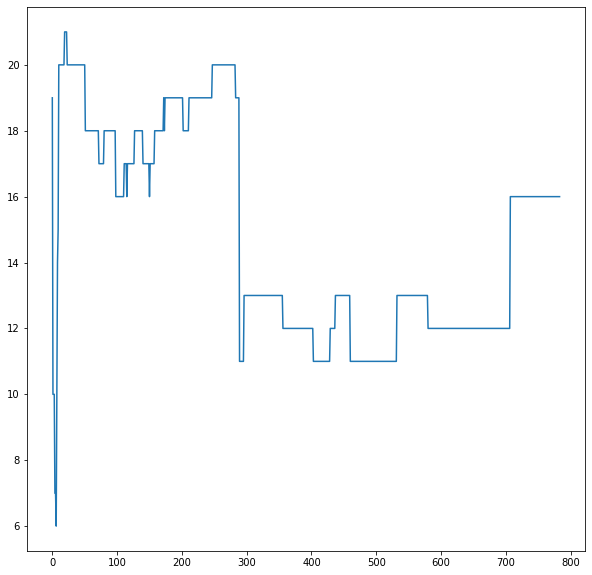

In [13]:
p1 = total_error_list
fig = plt.figure(figsize=(10, 10))
plt.plot(p1)

In [14]:
# it shows 7 is the best number
total_error_list

[19,
 10,
 10,
 10,
 7,
 7,
 6,
 10,
 14,
 15,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19

In [15]:
# sort the gene and make the heatmap
# other algorithm
# Random Forest
# Feature Selection